# Recoil Effects on Reflection from Relativistic Mirrors in Laser Plasmas

P. Valenta,$^{1, \, 2, \, \mathrm{*}}$ T. Zh. Esirkepov,$^{3}$ J. K. Koga,$^{3}$ A. S. Pirozhkov,$^{3}$ M. Kando,$^{3}$ T. Kawachi,$^{3}$ Y.-K. Liu,$^{4}$ P. Fang,$^{4}$ P. Chen,$^{4}$ J. Mu,$^{1}$ G. Korn,$^{1}$ O. Klimo,$^{1, \, 2}$ and S. V. Bulanov$^{1, \, 3, \, 5}$

$^{1)}$ ELI Beamlines, Institute of Physics, Czech Academy of Sciences, Na Slovance 2, 18221 Prague, Czech Republic  
$^{2)}$ Faculty of Nuclear Sciences and Physical Engineering, Czech Technical University in Prague, Brehova 7, 11519 Prague, Czech Republic  
$^{3)}$ Kansai Photon Science Institute, National Institutes for Quantum and Radiological Science and Technology, Umemidai 8-1-7, Kizugawa, 619-0215 Kyoto, Japan  
$^{4)}$ Leung Center for Cosmology and Particle Astrophysics, National Taiwan University, No. 1, Sec. 4, Roosevelt Rd., 10617 Taipei, Taiwan  
$^{5)}$ Prokhorov Institute of General Physics, Russian Academy of Sciences, Vavilova 38, 119991 Moscow, Russia

$^{\mathrm{*}}$ Electronic mail: <petr.valenta@eli-beams.eu>

(Dated: 05 March 2020)

 ### Abstract
Relativistic mirrors can be realized with strongly nonlinear Langmuir waves excited by intense laser pulses in underdense plasma. On reflection from the relativistic mirror, the incident light affects the mirror motion. The corresponding recoil effects are investigated analytically and using particle-in-cell simulations. It is found that if the fluence of the incident electromagnetic wave exceeds a certain threshold, the relativistic mirror undergoes a significant back reaction and splits into multiple electron layers. The reflection coefficient of the relativistic mirror and the factors of electric field amplification and frequency upshift of the electromagnetic wave are obtained.

---

### libraries:

In [1]:
import sdf
import numpy as np
import sympy as sp
sp.init_printing()
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
from scipy.constants import c, m_e, elementary_charge, epsilon_0, pi
from scipy.io import loadmat
from scipy.signal import hilbert, savgol_filter
from scipy.special import gamma as euler_gamma
from IPython.display import display

In [2]:
print("SDF:", sdf.__version__)
print("NumPy", np.__version__)
print("SymPy:", sp.__version__)
print("Matplotlib:", mpl.__version__)
print("SciPy:", sc.__version__)

SDF: 2.6.7
NumPy 1.15.4
SymPy: 1.1.1
Matplotlib: 2.1.2
SciPy: 1.0.0


### constants and data:

In [3]:
lambda0_d = 1.0e-6
lambda0_s = 5.0e-6
omega0_d = 2.0 * pi * c / lambda0_d
omega0_s = 2.0 * pi * c / lambda0_s
k0_s = 2.0 * pi / lambda0_s
a0_s = 1.0e-4
omega_pe = 0.1 * omega0_d
nc_d = epsilon_0 * m_e * omega0_d**2 / elementary_charge**2

In [4]:
beta = np.ravel(np.real(loadmat("./data/01/beta.mat")["beta"]))
gamma = np.ravel(np.real(loadmat("./data/01/gamma.mat")["gamma"]))
time = np.ravel(np.real(loadmat("./data/01/time.mat")["time_center"])) / (lambda0_d / c)
location = np.ravel(np.real(loadmat("./data/01/location.mat")["loc_center"])) / (lambda0_d)
time_transformed = np.ravel(np.real(loadmat("./data/01/time_transformed.mat")["t3"]))
em_field = sdf.read("./data/01/field0149.sdf") 
electron_density = sdf.read("./data/01/dens0149.sdf") 
em_field_1 = sdf.read("./data/02/field0099.sdf")
em_field_2 = sdf.read("./data/03/field0099.sdf")
em_field_3 = sdf.read("./data/04/field0099.sdf")
em_field_4 = sdf.read("./data/05/field0099.sdf")
em_field_5 = sdf.read("./data/06/field0099.sdf")
part_1 = sdf.read("./data/02/part0050.sdf")
part_2 = sdf.read("./data/06/part0050.sdf")

### analytical model:

In [5]:
electron_mass, speed_of_light, h_bar, omega, omega_0, gamma_e, gamma_e0, R, p_e, p_e0, N_e, p_gamma, p_gamma0, \
N_gamma, E_e0, E_e, E_gamma, E_gamma0 = sp.symbols("m_e, c, hbar, omega, omega_0, gamma_e, gamma_e_0, R, p_e, p_e_0, \
N_e, p_gamma, p_gamma_0, N_gamma, E_e_0, E_e, E_gamma, E_gamma_0")

In [6]:
energy = N_e * E_e0 + N_gamma * E_gamma0 - N_e * E_e  - R* N_gamma * E_gamma - (1 - R) * N_gamma * E_gamma0
display(energy)

In [7]:
momentum = N_e * p_e0 - N_gamma * p_gamma0 - N_e * p_e - R * N_gamma * p_gamma + (1 - R) * N_gamma * p_gamma0
display(momentum)

In [8]:
energy = energy.subs({E_e: electron_mass * speed_of_light**2 * gamma_e, 
                      E_e0: electron_mass * speed_of_light**2 * gamma_e0, 
                      E_gamma0: h_bar * omega_0, 
                      E_gamma: h_bar * omega})
display(energy)

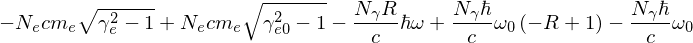

In [9]:
momentum = momentum.subs({p_e0: electron_mass * speed_of_light * sp.sqrt(gamma_e0**2 - 1),
                          p_e: electron_mass * speed_of_light * sp.sqrt(gamma_e**2 - 1),
                          p_gamma0: h_bar * omega_0 / speed_of_light, 
                          p_gamma: h_bar * omega / speed_of_light})
display(momentum)

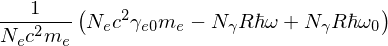

In [10]:
gamma_e1 = sp.solve(energy, gamma_e)
display(gamma_e1[0])

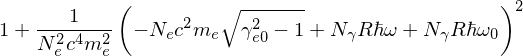

In [11]:
gamma_e2 = sp.solve(momentum, gamma_e**2)
display(gamma_e2[0])

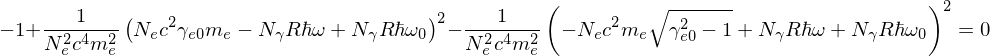

In [12]:
equation = sp.Eq(gamma_e1[0]**2 - gamma_e2[0], 0)
display(equation)

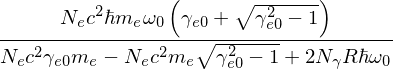

In [13]:
solution = sp.solve(equation, h_bar * omega)
display(solution[0])

### wake wave:

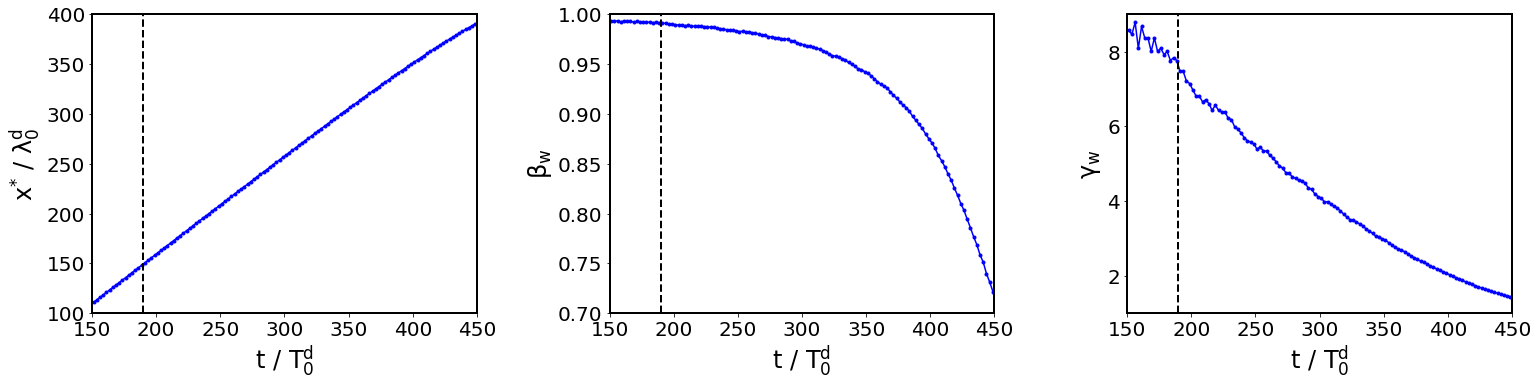

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

ax[0].plot(time, location, ".-", color="blue")
ax[0].grid(False)
ax[0].set_xlim(150, 450)
ax[0].set_ylim(100, 400)
ax[0].set_xlabel(r"$ \mathrm{t \ / \ T_0^d} $", fontsize=24)
ax[0].set_ylabel(r"$ \mathrm{x^{*} \ / \ \lambda_0^d} $", fontsize=24)
ax[0].tick_params(axis="both", which="major", labelsize=20)
ax[0].axvline(190, linestyle="--", color="black", linewidth=2)

ax[1].plot(time, beta, ".-", color="blue")
ax[1].grid(False)
ax[1].set_xlim(150, 450)
ax[1].set_ylim(0.7, 1)
ax[1].set_xlabel(r"$ \mathrm{t \ / \ T_0^d} $", fontsize=24)
ax[1].set_ylabel(r"$ \mathrm{\beta_w} $", fontsize=24)
ax[1].tick_params(axis="both", which="major", labelsize=20)
ax[1].axvline(190, linestyle="--", color="black", linewidth=2)

ax[2].plot(time, gamma, ".-", color="blue")
ax[2].grid(False)
ax[2].set_xlim(150, 450)
ax[2].set_ylim(1, 9)
ax[2].set_xlabel(r"$ \mathrm{t \ / \ T_0^d} $", fontsize=24)
ax[2].set_ylabel(r"$ \mathrm{\gamma_w} $", fontsize=24)
ax[2].tick_params(axis="both", which="major", labelsize=20)
ax[2].axvline(190, linestyle="--", color="black", linewidth=2)

fig.tight_layout(pad=3)

### reflected radiation:

In [15]:
ez = em_field.Electric_Field_Ez.data / (m_e * c * omega0_s / elementary_charge)
by = em_field.Magnetic_Field_By.data / (m_e * c * omega0_s / elementary_charge)
reflected_wave = 0.5 * (ez - c * by) / a0_s
transmitted_wave = 0.5 * (ez + c * by) / a0_s
ne = electron_density.Derived_Number_Density_electron.data / nc_d
ne_filtered = savgol_filter(ne, 501, 3)
grid_x = em_field.Grid_Grid.data[0][0:-1] / lambda0_d

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [16]:
dx = (grid_x[1] - grid_x[0]) * lambda0_d
index_1 = np.where(grid_x < 394.167)[0][-1]
index_2 = np.where(grid_x > 412.125)[0][0]
grid_x2 = grid_x[index_1:index_2 - 1]

instantaneous_phase = np.unwrap(np.angle(hilbert(reflected_wave)))
instantaneous_k = np.diff(instantaneous_phase[index_1:index_2]) / (dx * k0_s)
envelope = np.abs(hilbert(reflected_wave))[index_1:index_2-1]
refl_coef = (envelope / instantaneous_k)

instantaneous_k_filtered = savgol_filter(instantaneous_k, 501, 3)
envelope_filtered = savgol_filter(envelope, 501, 3)
refl_coef_filtered = savgol_filter((envelope / instantaneous_k_filtered), 1001, 3)

refl_coef_analytic = euler_gamma(2.0/3.0)**2 / (4.0 * 3.0**(4/3)) * (omega_pe / omega0_s)**(8/3) * gamma**(-4/3)
upshift_analytic = 2.0 * gamma**2 + 2.0 * gamma * np.sqrt(gamma**2 - 1.0) * np.sqrt(1.0 - omega_pe**2/omega0_s**2) - 1.0
amplification_analytic = upshift_analytic * np.sqrt(refl_coef_analytic)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


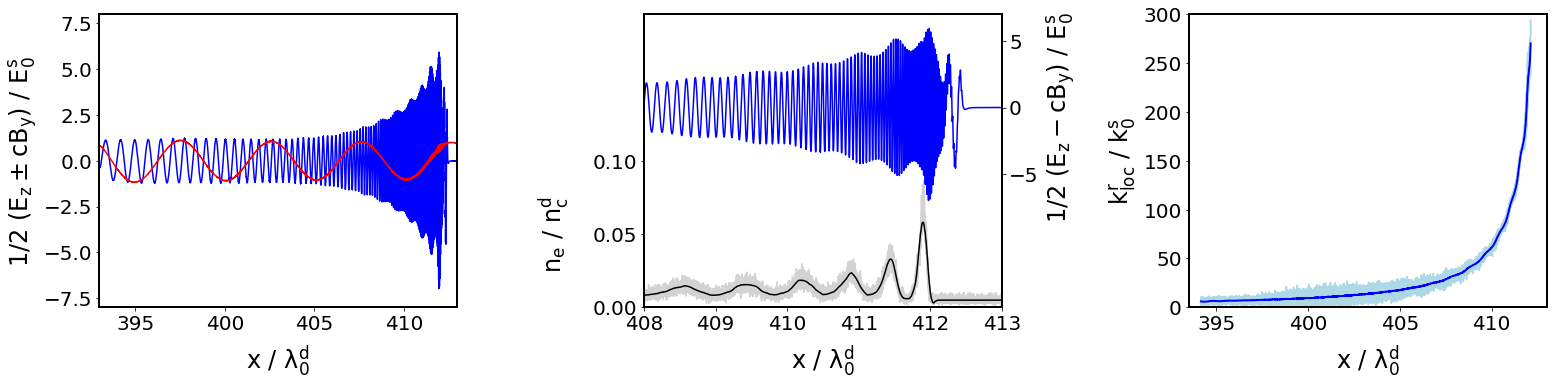

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

ax[0].plot(grid_x, reflected_wave, color="blue")
ax[0].plot(grid_x, transmitted_wave, color="red")
ax[0].set_xlim(393, 413)
ax[0].set_ylim(-8, 8)
ax[0].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0^d} $", fontsize=24, labelpad=10)
ax[0].set_ylabel(r"$ \mathrm{1/2 \ (E_z \pm c B_y) \ / \ E_0^s} $", fontsize=24)
ax[0].tick_params(axis="both", which="major", labelsize=20)

ax[1].plot(grid_x, ne, color="lightgray")
ax[1].plot(grid_x, ne_filtered, color="black")
ax[1].set_ylim(0.0, 0.2)
ax[1].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0^d} $", fontsize=24, labelpad=10)
ax[1].set_ylabel(r"$ \mathrm{n_e \ / \ n_c^d} $", fontsize=24)
ax[1].tick_params(axis="both", which="major", labelsize=20)
ax[1].get_yaxis().set_ticks([0, 0.05, 0.1])
ax[1].yaxis.set_label_coords(-0.2, 0.25)

ax1_b = ax[1].twinx()
ax1_b.plot(grid_x, reflected_wave, color="blue")
ax1_b.set_xlim(408, 413)
ax1_b.set_ylim(-15, 7)
ax1_b.set_ylabel(r"$ \mathrm{1/2 \ (E_z - c B_y) \ / \ E_0^s} $", fontsize=24)
ax1_b.tick_params(axis="both", which="major", labelsize=20)
ax1_b.get_yaxis().set_ticks([-5, 0.0, 5])
ax1_b.yaxis.set_label_coords(1.12, 0.65)

ax[2].plot(grid_x2, instantaneous_k, color="lightblue")
ax[2].plot(grid_x2, instantaneous_k_filtered, color="blue", linewidth=2)
ax[2].set_xlim(393.5, 413)
ax[2].set_ylim(0, 300)
ax[2].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0^d} $", fontsize=24, labelpad=10)
ax[2].set_ylabel(r"$ \mathrm{k_{loc}^r \ / \ k_0^s} $", fontsize=24)
ax[2].tick_params(axis="both", which="major", labelsize=20)
ax[2].get_xaxis().set_ticks([395, 400, 405, 410])

fig.tight_layout(pad=3)

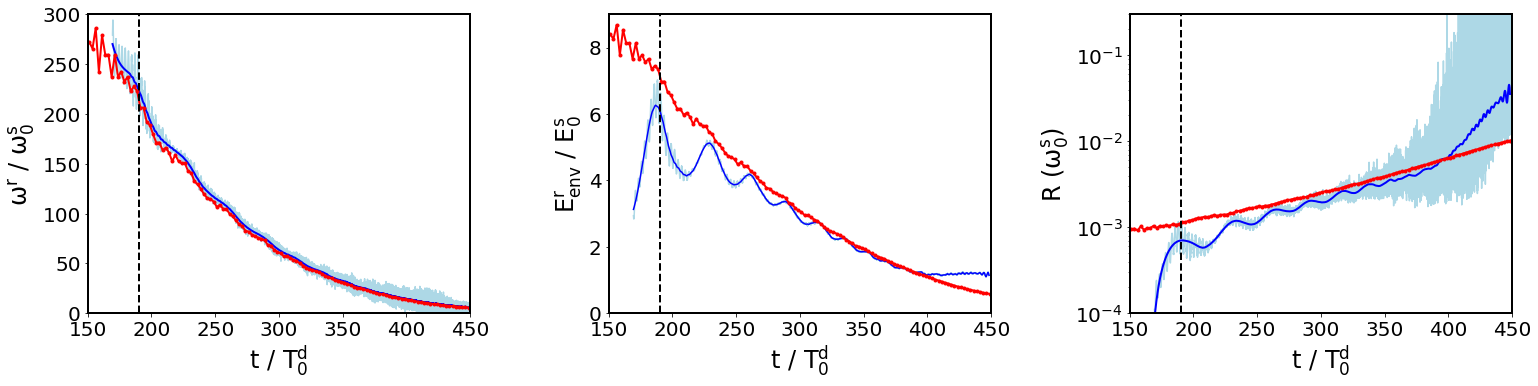

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

ax[0].plot(time_transformed, instantaneous_k, color="lightblue")
ax[0].plot(time_transformed, instantaneous_k_filtered, linewidth=2, color="blue")
ax[0].plot(time, upshift_analytic, ".-", color="red", linewidth=2)
ax[0].grid(False)
ax[0].set_xlim(150, 450)
ax[0].set_ylim(0, 300)
ax[0].set_xlabel(r"$ \mathrm{t \ / \ T_0^d} $", fontsize=24)
ax[0].set_ylabel(r"$ \mathrm{\omega^r \ / \ \omega_0^s} $", fontsize=24)
ax[0].tick_params(axis="both", which="major", labelsize=20)
ax[0].axvline(190, linestyle="--", color="black", linewidth=2)

ax[1].plot(time_transformed, envelope, color="lightblue")
ax[1].plot(time_transformed, envelope_filtered, color="blue")
ax[1].plot(time, amplification_analytic, ".-", color="red", linewidth=2)
ax[1].grid(False)
ax[1].set_xlim(150, 450)
ax[1].set_ylim(0, 9)
ax[1].set_xlabel(r"$ \mathrm{t \ / \ T_0^d} $", fontsize=24)
ax[1].set_ylabel(r"$ \mathrm{E_{env}^r \ / \ E_0^s} $", fontsize=24)
ax[1].tick_params(axis="both", which="major", labelsize=20)
ax[1].axvline(190, linestyle="--", color="black", linewidth=2)

ax[2].semilogy(time_transformed, refl_coef**2, color="lightblue")
ax[2].semilogy(time_transformed, refl_coef_filtered**2, color="blue", linewidth=2)
ax[2].semilogy(time, refl_coef_analytic, ".-", color="red", linewidth=2)
ax[2].grid(False)
ax[2].set_xlim(150, 450)
ax[2].set_ylim(0.0001, 0.3)
ax[2].set_xlabel(r"$ \mathrm{t \ / \ T_0^d} $", fontsize=24)
ax[2].set_ylabel(r"$ \mathrm{R \ (\omega_0^s)} $", fontsize=24)
ax[2].tick_params(axis="both", which="major", labelsize=20)
ax[2].axvline(190, linestyle="--", color="black", linewidth=2)

fig.tight_layout(pad=3)

### energy threshold:

In [19]:
ez_1 = em_field_1.Electric_Field_Ez.data / (m_e * c * omega0_s / elementary_charge)
by_1 = em_field_1.Magnetic_Field_By.data / (m_e * c * omega0_s / elementary_charge)
grid_x_1 = em_field_1.Grid_Grid.data[0][0:-1] / lambda0_d

In [20]:
ez_2 = em_field_2.Electric_Field_Ez.data / (m_e * c * omega0_s / elementary_charge)
by_2 = em_field_2.Magnetic_Field_By.data / (m_e * c * omega0_s / elementary_charge)
grid_x_2 = em_field_2.Grid_Grid.data[0][0:-1] / lambda0_d

In [21]:
ez_3 = em_field_3.Electric_Field_Ez.data / (m_e * c * omega0_s / elementary_charge)
by_3 = em_field_3.Magnetic_Field_By.data / (m_e * c * omega0_s / elementary_charge)
grid_x_3 = em_field_3.Grid_Grid.data[0][0:-1] / lambda0_d

In [22]:
ez_4 = em_field_4.Electric_Field_Ez.data / (m_e * c * omega0_s / elementary_charge)
by_4 = em_field_4.Magnetic_Field_By.data / (m_e * c * omega0_s / elementary_charge)
grid_x_4 = em_field_4.Grid_Grid.data[0][0:-1] / lambda0_d

In [23]:
ez_5 = em_field_5.Electric_Field_Ez.data / (m_e * c * omega0_s / elementary_charge)
by_5 = em_field_5.Magnetic_Field_By.data / (m_e * c * omega0_s / elementary_charge)
grid_x_5 = em_field_5.Grid_Grid.data[0][0:-1] / lambda0_d

Text(0.5,0,'$ \\mathrm{x \\ / \\lambda_0^d} $')

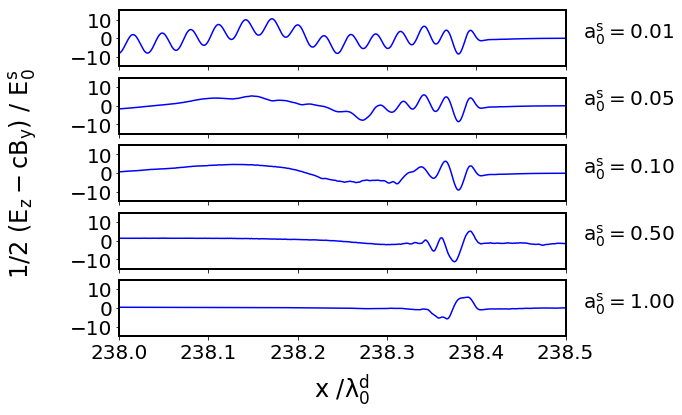

In [24]:
fig, ax = plt.subplots(5, 1, figsize=(8, 6))

ax[0].plot(grid_x_1, 0.5 * (ez_1 - c * by_1) / 0.01, color="blue")
ax[0].set_xlim(238.0, 238.5)
ax[0].set_ylim(-15, +15)
ax[0].get_xaxis().set_ticklabels([])
ax[0].tick_params(axis="both", which="major", labelsize=20)
ax[0].text(238.52, 0, r"$ \mathrm{a_0^s = 0.01} $", fontsize=20)

ax[1].plot(grid_x_2, 0.5 * (ez_2 - c * by_2) / 0.05, color="blue")
ax[1].set_xlim(238.0, 238.5)
ax[1].set_ylim(-15, +15)
ax[1].get_xaxis().set_ticklabels([])
ax[1].tick_params(axis="both", which="major", labelsize=20)
ax[1].text(238.52, 0, r"$ \mathrm{a_0^s = 0.05} $", fontsize=20)

ax[2].plot(grid_x_3, 0.5 * (ez_3 - c * by_3) / 0.1, color="blue")
ax[2].set_xlim(238.0, 238.5)
ax[2].set_ylim(-15, +15)
ax[2].get_xaxis().set_ticklabels([])
ax[2].tick_params(axis="both", which="major", labelsize=20)
ax[2].text(238.52, 0, r"$ \mathrm{a_0^s = 0.10} $", fontsize=20)

ax[3].plot(grid_x_4, 0.5 * (ez_4 - c * by_4) / 0.5, color="blue")
ax[3].set_xlim(238.0, 238.5)
ax[3].set_ylim(-15, +15)
ax[3].get_xaxis().set_ticklabels([])
ax[3].tick_params(axis="both", which="major", labelsize=20)
ax[3].text(238.52, 0, r"$ \mathrm{a_0^s = 0.50} $", fontsize=20)

ax[4].plot(grid_x_5, 0.5 * (ez_5 - c * by_5) / 1.0, color="blue")
ax[4].set_xlim(238.0, 238.5)
ax[4].set_ylim(-15, +15)
ax[4].tick_params(axis="both", which="major", labelsize=20)
ax[4].text(238.52, 0, r"$ \mathrm{a_0^s = 1.00} $", fontsize=20)

ax[2].set_ylabel(r"$ \mathrm{1/2 \ (E_z - c B_y) \ / \ E_0^s} $", fontsize=24, labelpad=30)
ax[4].set_xlabel(r"$ \mathrm{x \ / \lambda_0^d} $", fontsize=24, labelpad=10)

### phase space:

In [25]:
electron_px_1 = part_1.Particles_Px_electron.data / (m_e * c)
electron_x_1 = part_1.Grid_Particles_electron.data[0] / lambda0_d

In [26]:
electron_px_2 = part_2.Particles_Px_electron.data / (m_e * c)
electron_x_2 = part_2.Grid_Particles_electron.data[0] / lambda0_d

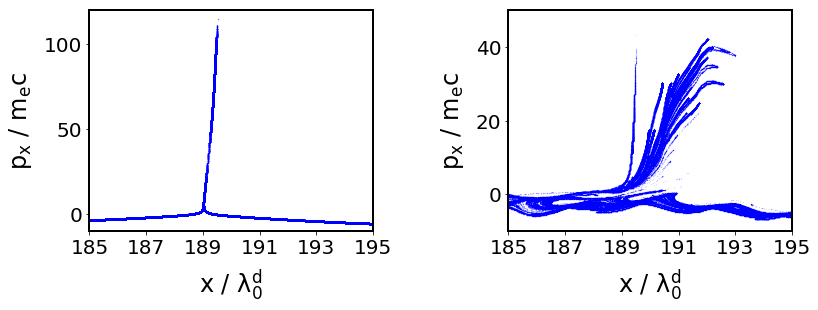

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(electron_x_1, electron_px_1, '.', color="blue", markersize=0.5, rasterized=True)
ax[0].set_xlim(185, 195)
ax[0].set_ylim(-10, 120)
ax[0].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0^d} $", fontsize=24, labelpad=10)
ax[0].set_ylabel(r"$ \mathrm{p_x \ / \ m_e c} $", fontsize=24, labelpad=10)
ax[0].get_xaxis().set_ticks([185, 187, 189, 191, 193, 195])
ax[0].tick_params(axis="both", which="major", labelsize=20)
ax[0].grid(False)

ax[1].plot(electron_x_2, electron_px_2, '.', color="blue", markersize=0.1, rasterized=True)
ax[1].set_xlim(185, 195)
ax[1].set_ylim(-10, 50)
ax[1].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0^d} $", fontsize=24, labelpad=10)
ax[1].set_ylabel(r"$ \mathrm{p_x \ / \ m_e c} $", fontsize=24, labelpad=10)
ax[1].get_xaxis().set_ticks([185, 187, 189, 191, 193, 195])
ax[1].tick_params(axis="both", which="major", labelsize=20)
ax[1].grid(False)

fig.tight_layout(pad=3)